#  The Hampy patch viewer

The hammurabi code comes with a python viewer for looking at the resulting observables in the case that only a patch of the sky is observed.  (Healpy will display only a full-sky HEALPix map.  If the patch is a small patch at high resolution, e.g., with Nside=8192 or above, it requires too much memory to create a mostly-empty map simply to call gnomview() on it.) 

First, set your PYTHONPATH variable to the hampy directory, e.g.,

setenv PYTHONPATH /path/to/hammurabi/hampy/

or equivalent.

Then import necessary libraries:

In [1]:
import hampy
import healpy as hp
import numpy as np
from view_patch import view_patch
import matplotlib
%matplotlib inline

This hammurabi example uses an external box containing an SNR simulation, places it 2kpc away, and integrates only the patch of the sky containing the object.  

In [23]:
#ham.cleanup()
ham=hampy.Hampy(custom_parameters="test/params_SNR_quick.txt",working_directory="./test_SNR_quick.out")

#  Let's turn off the random component for now
ham.call(custom_parameters={"B_field_do_random":"F","obs_freq_GHz":"1.4"})

...

0

The notebook Hampy_view_field shows how to view the field grids themselves.  Note that the view_patch() function returns the data cube (i.e. the observables from the list interpolated onto a cartesian image grid.)

There are several ways to look at the observables.  But you have to be able to tell the viewer what the Nside is, since it cannot tell only from a pixel number.  And tell it which observable to plot:

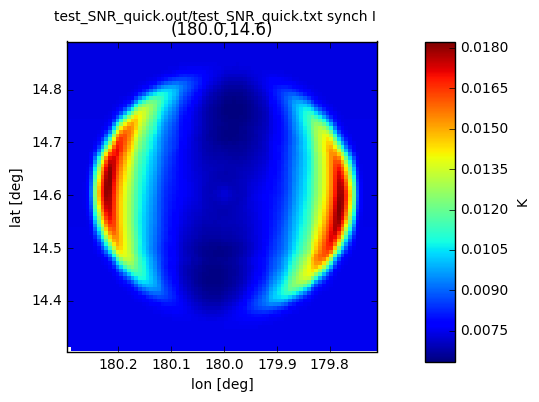

In [24]:
data=view_patch(infile='test_SNR_quick.out/test_SNR_quick.txt',
                synch=True,
                nside=8192
               )

Next we can look at the synchrotron polarized intensity, which looks very similar in this example:

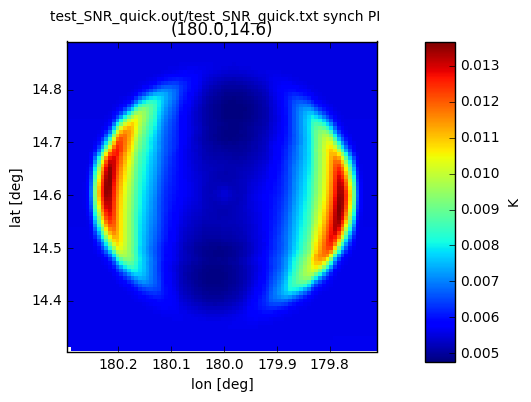

In [25]:
data=view_patch(infile='test_SNR_quick.out/test_SNR_quick.txt',
           nside=8192,
           synch=True,
           polarization=1
          )

Total intensity with headless vectors showing the polarization direction:

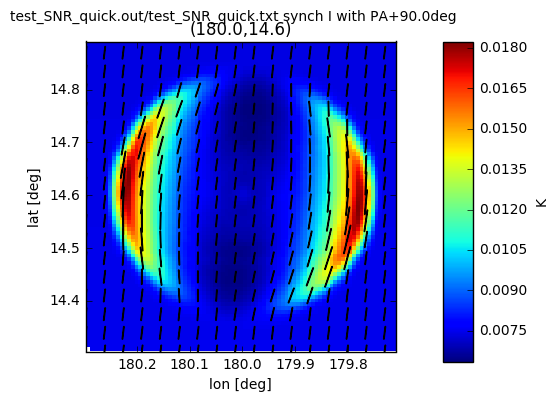

In [26]:
data=view_patch(infile='test_SNR_quick.out/test_SNR_quick.txt',
           nside=8192,
           synch=True,
           polarization=3
          )

Or with the vectors on top of the polarized intensity, and here we also increase the frequency of the vectors (lower bskip) and decrease their length (relative to the size of the image):
    

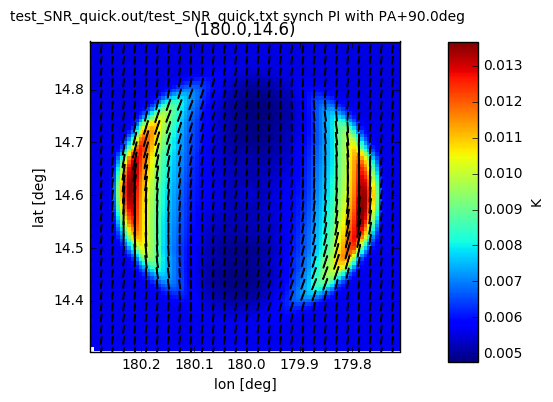

In [27]:
data=view_patch(infile='test_SNR_quick.out/test_SNR_quick.txt',
           nside=8192,
           synch=True,
           polarization=4,
           bskip=3,
           bscale=0.03
          )

Or make all the arrows the same length, no longer proportional to the PI:

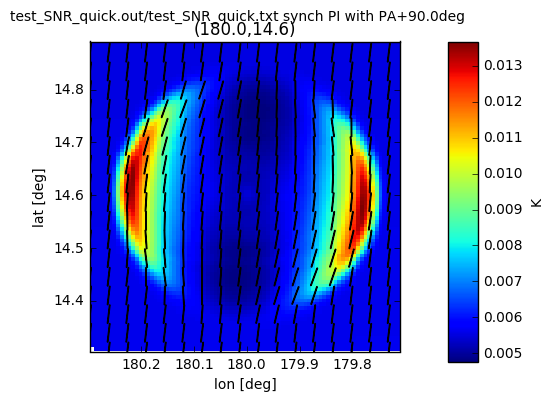

In [28]:
data=view_patch(infile='test_SNR_quick.out/test_SNR_quick.txt',
           nside=8192,
           synch=True,
           polarization=4,
           bscale=0.03,
           bconst=True
          )

Or the angle:

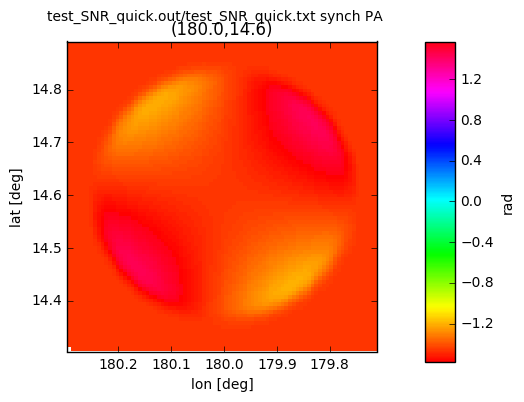

In [29]:
data=view_patch(infile='test_SNR_quick.out/test_SNR_quick.txt',
           nside=8192,
           synch=True,
           polarization=2
          )

Or we can select a column.  Lists of observables written by hammurabi contain:

     ipix freq[GHz] I_s Q_s U_s I_d Q_d U_d int_dist[kpc] RM[rad/m^2] DM[pc/cm^3]

and the viewer expects a column number (starting at 0):

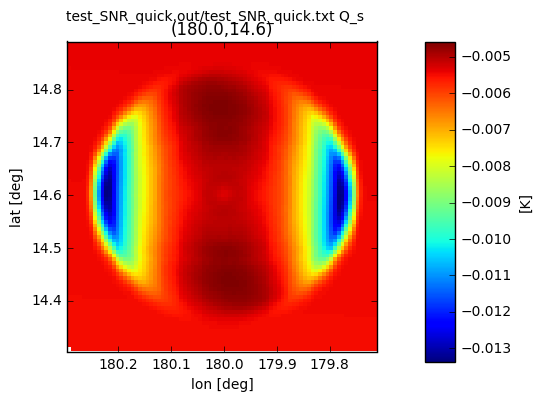

In [30]:
data=view_patch(infile='test_SNR_quick.out/test_SNR_quick.txt',
           nside=8192,
           column=3,
          )

Print the view_patch() help.  Note that it displays the command-line interface.  In that case, you would do, for example,

view_field test_SNR_quick.out/test_SNR_quick.txt 8192 --synch --polarization=3

etc.  (The first two parameters are mandatory and positional, while the rest are optional, as indicated by the prefix '--'.)


In [31]:
view_patch()

usage: __main__.py [-h] [--PArot PAROT] [--bcolor BCOLOR] [--bconst]
                   [--bscale BSCALE] [--bskip BSKIP] [--cmap CMAP]
                   [--column COLUMN] [--crosshairs] [--dust]
                   [--graticule GRATICULE] [--max MAX] [--min MIN]
                   [--outfile OUTFILE] [--polarization POLARIZATION] [--rm]
                   [--rot ROT] [--smooth SMOOTH] [--synch] [--title TITLE]
                   [--xsize XSIZE] [--ysize YSIZE]
                   infile nside

positional arguments:
  infile                Input file name, i.e., a list written by hammurabi of
                        pixel numbers and observables. The map must be in
                        NESTED mode.
  nside                 Nside of the map; this must match the Nside at which
                        the input list was written.

optional arguments:
  -h, --help            show this help message and exit
  --PArot PAROT         Rotation to apply to polarization angle for plotting
       